* [1.DataOverview](#1.DataOverview)
* [2.Visualization](#2.Visualization)
    * [2.1 Visualization for Date](#21)
    * [2.2 Visualization for Risk](#22)
        * [2.2.1 Visualization for Risk 1(High)](#221)
        * [2.2.2 Visualization for Risk 2(Medium)](#222)
        * [2.2.3 Visualization for Risk 3(Low)](#223)
    * [2.3 Visualization for Facility Type](#23)
    * [2.4 Visualization for Results of inspection](#24)


In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import os 
import seaborn as sns
import geopandas as gpd
import folium
from folium import plugins
import datetime
import math

In [2]:
os.listdir("../input/chicago-food-inspections")

['socrata_metadata.json', 'food-inspections.csv']

# 1.DataOverview

This data size is 192,392,and the variables include 'Inspection ID','DBA Name','AKA Name',and so on.

I drop out the missing value from 'Violations','Facility Type','Latitude',and 'Longitude'.

Because I will use these variables to make some visualiztion.

# Please upvote it if you like this kernel.
# Thank you

The photo is from:https://ac-illust.com/tw/clip-art/626399/%E4%B8%80%E9%9A%BB%E9%9E%A0%E8%BA%AC%E7%9A%84%E5%85%94%E5%AD%90

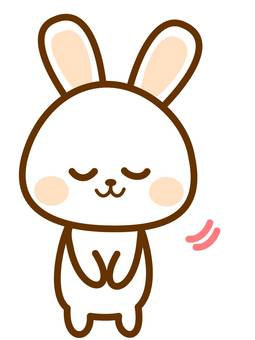

In [3]:
data=pd.read_csv("../input/chicago-food-inspections/food-inspections.csv")
data.head()

Inspection ID                           DBA Name  \
0        2311862                   WALGREENS #15197   
1        2311920          K & H FOOD MART PLUS, INC   
2        2311861  IRVING PARK INFANT TODDLER CENTER   
3        2311872            TZUCO / TALES / PANANGO   
4        2311888            TZUCO / TALES / PANANGO   

                            AKA Name  License #                 Facility Type  \
0                          WALGREENS  2245833.0                 Grocery Store   
1               K & H FOOD MART PLUS  2684475.0                 Grocery Store   
2  IRVING PARK INFANT TODDLER CENTER  2215932.0  Children's Services Facility   
3            TZUCO / TALES / PANANGO  2641367.0                    Restaurant   
4            TZUCO / TALES / PANANGO  2641368.0                    Restaurant   

            Risk               Address     City State      Zip  ...  \
0   Risk 3 (Low)      6121 N BROADWAY   CHICAGO    IL  60660.0  ...   
1   Risk 3 (Low)     3929 W GRAND AVE   CHICAGO    IL  60651.0  ...   
2  Risk 1 (High)  3000 W MONTROSE AVE   CHICAGO    IL  60618.0  ...   
3  Risk 1 (High)   718-720 N STATE ST   CHICAGO    IL  60654.0  ...   
4   Risk 3 (Low)   718-720 N STATE ST   CHICAGO    IL  60654.0  ...   

              Results                                         Violations  \
0                Fail  54. GARBAGE & REFUSE PROPERLY DISPOSED; FACILI...   
1  Pass w/ Conditions  5. PROCEDURES FOR RESPONDING TO VOMITING AND D...   
2                Pass                                                NaN   
3                Pass  58. ALLERGEN TRAINING AS REQUIRED - Comments: ...   
4                Pass                                                NaN   

    Latitude  Longitude                                           Location  \
0  41.992938 -87.660210  {'latitude': '-87.66021032628072', 'longitude'...   
1  41.905512 -87.725112  {'latitude': '-87.72511200015292', 'longitude'...   
2  41.961328 -87.703420  {'latitude': '-87.70341967620591', 'longitude'...   
3  41.895564 -87.628318  {'latitude': '-87.62831821079553', 'longitude'...   
4  41.895564 -87.628318  {'latitude': '-87.62831821079553', 'longitude'...   

   Historical Wards 2003-2015 Zip Codes  Community Areas  Census Tracts  Wards  
0                         NaN       NaN              NaN            NaN    NaN  
1                         NaN       NaN              NaN            NaN    NaN  
2                         NaN       NaN              NaN            NaN    NaN  
3                         NaN       NaN              NaN            NaN    NaN  
4                         NaN       NaN              NaN            NaN    NaN  

[5 rows x 22 columns]

In [4]:
len(data)

192392

Text(0.5, 1.0, 'counts of missing value')

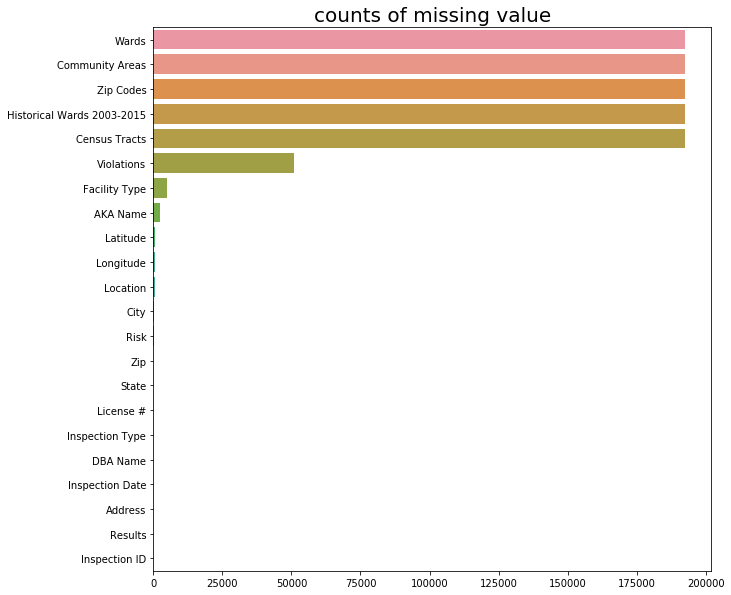

In [5]:
plt.figure(figsize=(10,10))
sns.barplot(x=data.isnull().sum().sort_values(ascending=False),y=data.isnull().sum().sort_values(ascending=False).index)
plt.title("counts of missing value",size=20)


In [6]:
data=data.dropna(subset=['Violations','Facility Type','Latitude','Longitude','AKA Name'])
data.isnull().sum()

Inspection ID                      0
DBA Name                           0
AKA Name                           0
License #                         11
Facility Type                      0
Risk                               1
Address                            0
City                              58
State                             22
Zip                                9
Inspection Date                    0
Inspection Type                    0
Results                            0
Violations                         0
Latitude                           0
Longitude                          0
Location                           0
Historical Wards 2003-2015    139643
Zip Codes                     139643
Community Areas               139643
Census Tracts                 139643
Wards                         139643
dtype: int64

# 2.Visualization

<h3 id="21">2.1 Visualization for Date

In [7]:
data['year']=data['Inspection Date'].apply(lambda x:x.split('-')[0])
data['month']=data['Inspection Date'].apply(lambda x:x.split('-')[1])
data['day']=data['Inspection Date'].apply(lambda x:x.split('-')[2].split('T')[0])
data.head()

Inspection ID                   DBA Name                 AKA Name  \
0        2311862           WALGREENS #15197                WALGREENS   
1        2311920  K & H FOOD MART PLUS, INC     K & H FOOD MART PLUS   
3        2311872    TZUCO / TALES / PANANGO  TZUCO / TALES / PANANGO   
5        2311900     MIKKEYS 47 EXPRESS LLC   MIKKEYS 47 EXPRESS LLC   
6        2311894              SUBWAY #24879                   SUBWAY   

   License #  Facility Type           Risk              Address     City  \
0  2245833.0  Grocery Store   Risk 3 (Low)     6121 N BROADWAY   CHICAGO   
1  2684475.0  Grocery Store   Risk 3 (Low)    3929 W GRAND AVE   CHICAGO   
3  2641367.0     Restaurant  Risk 1 (High)  718-720 N STATE ST   CHICAGO   
5  2678083.0     Restaurant  Risk 1 (High)       503 E 47TH ST   CHICAGO   
6  2689652.0     Restaurant  Risk 1 (High)  3951 N KIMBALL AVE   CHICAGO   

  State      Zip  ...  Longitude  \
0    IL  60660.0  ... -87.660210   
1    IL  60651.0  ... -87.725112   
3    IL  60654.0  ... -87.628318   
5    IL  60653.0  ... -87.613714   
6    IL  60618.0  ... -87.712743   

                                            Location  \
0  {'latitude': '-87.66021032628072', 'longitude'...   
1  {'latitude': '-87.72511200015292', 'longitude'...   
3  {'latitude': '-87.62831821079553', 'longitude'...   
5  {'latitude': '-87.61371443505487', 'longitude'...   
6  {'latitude': '-87.71274346541044', 'longitude'...   

  Historical Wards 2003-2015 Zip Codes  Community Areas  Census Tracts Wards  \
0                        NaN       NaN              NaN            NaN   NaN   
1                        NaN       NaN              NaN            NaN   NaN   
3                        NaN       NaN              NaN            NaN   NaN   
5                        NaN       NaN              NaN            NaN   NaN   
6                        NaN       NaN              NaN            NaN   NaN   

   year  month  day  
0  2019     09   06  
1  2019     09   06  
3  2019     09   06  
5  2019     09   06  
6  2019     09   06  

[5 rows x 25 columns]

Text(0.5, 0, 'month')

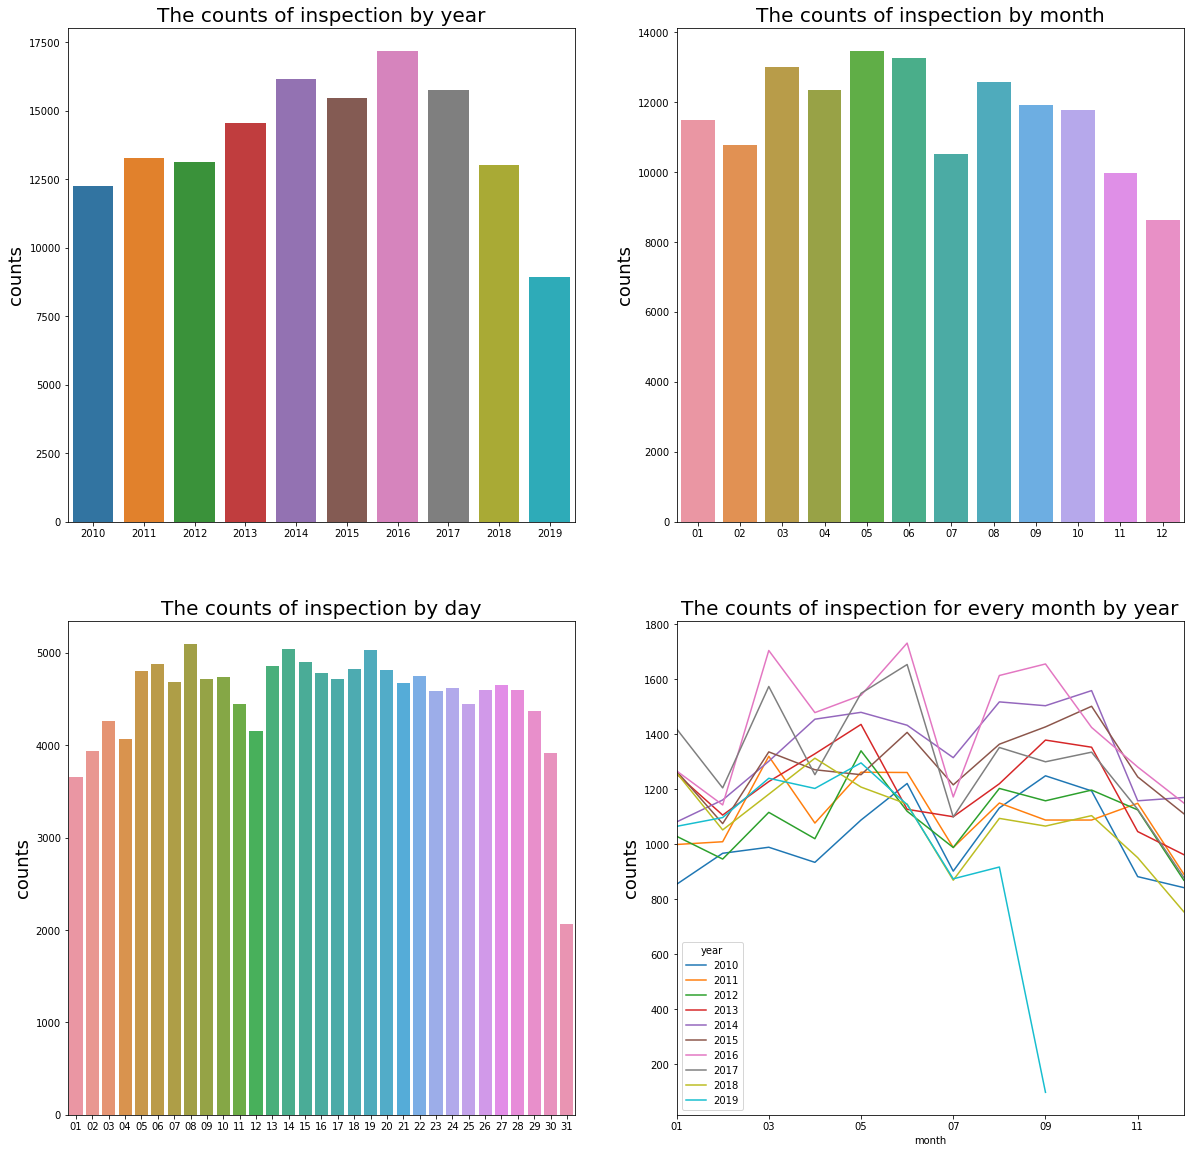

In [8]:
fig,ax=plt.subplots(2,2,figsize=(20,20))
x=data.year.value_counts().index
y=data.year.value_counts()
sns.barplot(x=x,y=y,ax=ax[0,0])
ax[0,0].set_title("The counts of inspection by year",size=20)
ax[0,0].set_ylabel('counts',size=18)
ax[0,0].set_xlabel('')

x=data.month.value_counts().index
y=data.month.value_counts()
sns.barplot(x=x,y=y,ax=ax[0,1])
ax[0,1].set_title("The counts of inspection by month",size=20)
ax[0,1].set_ylabel('counts',size=18)
ax[0,1].set_xlabel('')

x=data.day.value_counts().index
y=data.day.value_counts()
sns.barplot(x=x,y=y,ax=ax[1,0])
ax[1,0].set_title("The counts of inspection by day",size=20)
ax[1,0].set_ylabel('counts',size=18)
ax[1,0].set_xlabel('')

data.groupby(['year','month'])['Inspection ID'].agg('count').unstack('year').plot(ax=ax[1,1])
ax[1,1].set_title("The counts of inspection for every month by year",size=20)
ax[1,1].set_ylabel('counts',size=18)
ax[1,1].set_xlabel('month')

<h3 id="22">2.2 Visualization for Risk

Text(0, 0.5, 'LATITUDE')

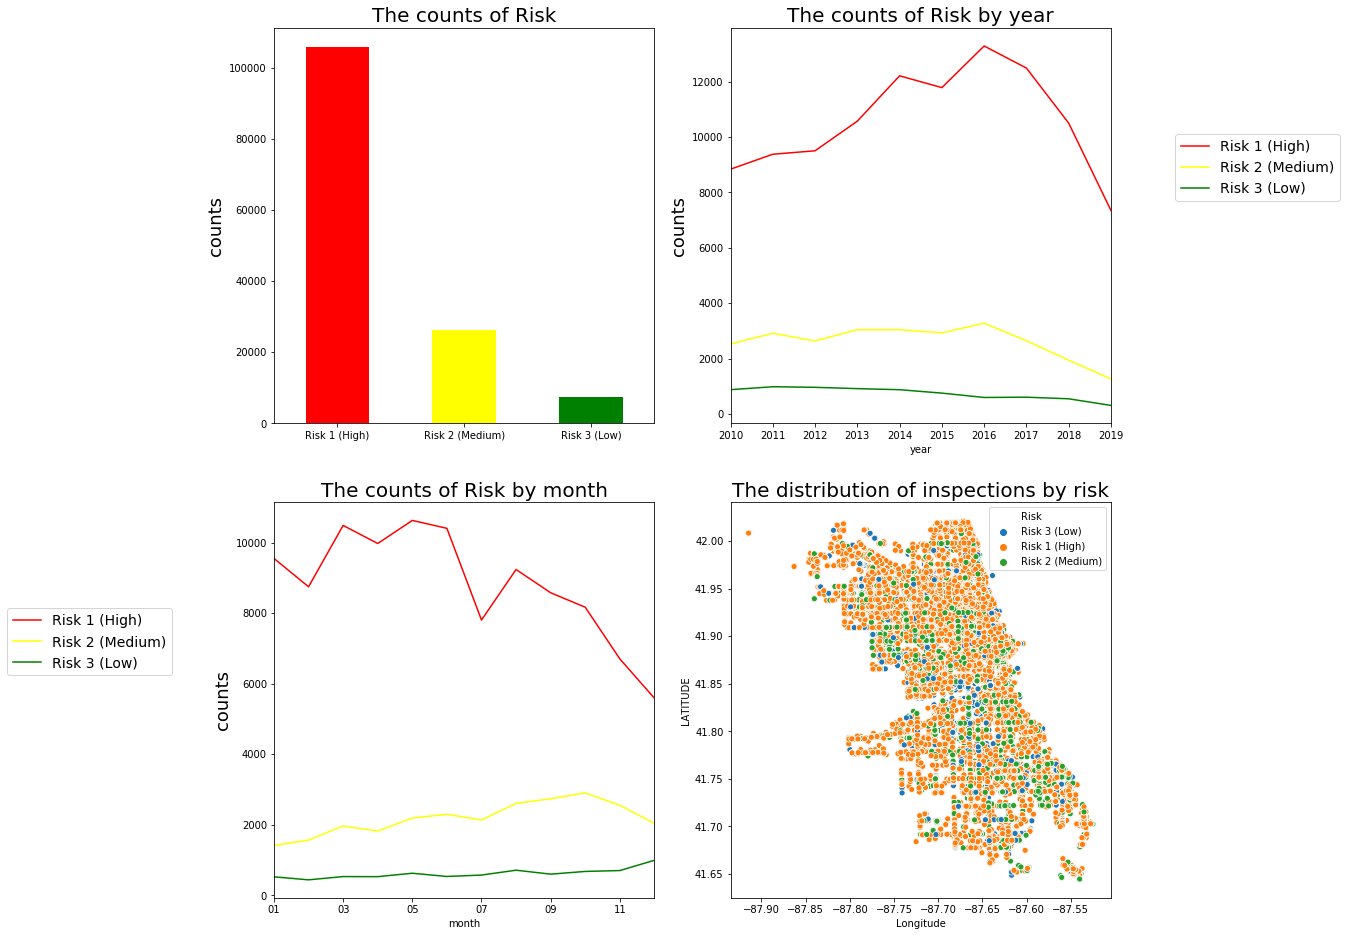

In [9]:
fig,ax=plt.subplots(2,2,figsize=(15,16))
data.Risk.value_counts().plot(kind='bar',color=['red','yellow','green'],ax=ax[0,0])
ax[0,0].tick_params(axis='x',labelrotation=360)
ax[0,0].set_title("The counts of Risk",size=20)
ax[0,0].set_ylabel('counts',size=18)


data.groupby(['year','Risk'])['Inspection ID'].agg('count').unstack('Risk').plot(ax=ax[0,1],color=['red','yellow','green'])
ax[0,1].legend(loc=0, ncol=1, fontsize=14,bbox_to_anchor=(1.15,0.75))
ax[0,1].set_title("The counts of Risk by year",size=20)
ax[0,1].set_ylabel('counts',size=18)

data.groupby(['month','Risk'])['Inspection ID'].agg('count').unstack('Risk').plot(ax=ax[1,0],color=['red','yellow','green'])
ax[1,0].legend(loc=0, ncol=1, fontsize=14,bbox_to_anchor=(-0.25,0.75))
ax[1,0].set_title("The counts of Risk by month",size=20)
ax[1,0].set_ylabel('counts',size=18)

sns.scatterplot(x='Longitude',y='Latitude',hue='Risk' ,data=data, ax=ax[1,1])
ax[1,1].set_title("The distribution of inspections by risk",size=20)
ax[1,1].set_xlabel('Longitude')
ax[1,1].set_ylabel('LATITUDE')


<h3 id="221">2.2.1 Visualization for Risk 1(High)

In [10]:
data_risk1=data[data.Risk=='Risk 1 (High)']
data_risk1.head()

Inspection ID                 DBA Name                 AKA Name  License #  \
3        2311872  TZUCO / TALES / PANANGO  TZUCO / TALES / PANANGO  2641367.0   
5        2311900   MIKKEYS 47 EXPRESS LLC   MIKKEYS 47 EXPRESS LLC  2678083.0   
6        2311894            SUBWAY #24879                   SUBWAY  2689652.0   
8        2311877                 Wildwood                 Wildwood    25881.0   
9        2311881    ST. ROBERT BELLARMINE    ST. ROBERT BELLARMINE  2102640.0   

  Facility Type           Risk              Address     City State      Zip  \
3    Restaurant  Risk 1 (High)  718-720 N STATE ST   CHICAGO    IL  60654.0   
5    Restaurant  Risk 1 (High)       503 E 47TH ST   CHICAGO    IL  60653.0   
6    Restaurant  Risk 1 (High)  3951 N KIMBALL AVE   CHICAGO    IL  60618.0   
8        School  Risk 1 (High)     6950 N Hiawatha   CHICAGO    IL  60646.0   
9        School  Risk 1 (High)     6036 W EASTWOOD   CHICAGO    IL  60630.0   

   ...  Longitude                                           Location  \
3  ... -87.628318  {'latitude': '-87.62831821079553', 'longitude'...   
5  ... -87.613714  {'latitude': '-87.61371443505487', 'longitude'...   
6  ... -87.712743  {'latitude': '-87.71274346541044', 'longitude'...   
8  ... -87.778371  {'latitude': '-87.77837089379373', 'longitude'...   
9  ... -87.778690  {'latitude': '-87.77868958463064', 'longitude'...   

  Historical Wards 2003-2015 Zip Codes  Community Areas  Census Tracts Wards  \
3                        NaN       NaN              NaN            NaN   NaN   
5                        NaN       NaN              NaN            NaN   NaN   
6                        NaN       NaN              NaN            NaN   NaN   
8                        NaN       NaN              NaN            NaN   NaN   
9                        NaN       NaN              NaN            NaN   NaN   

   year  month  day  
3  2019     09   06  
5  2019     09   06  
6  2019     09   06  
8  2019     09   06  
9  2019     09   06  

[5 rows x 25 columns]

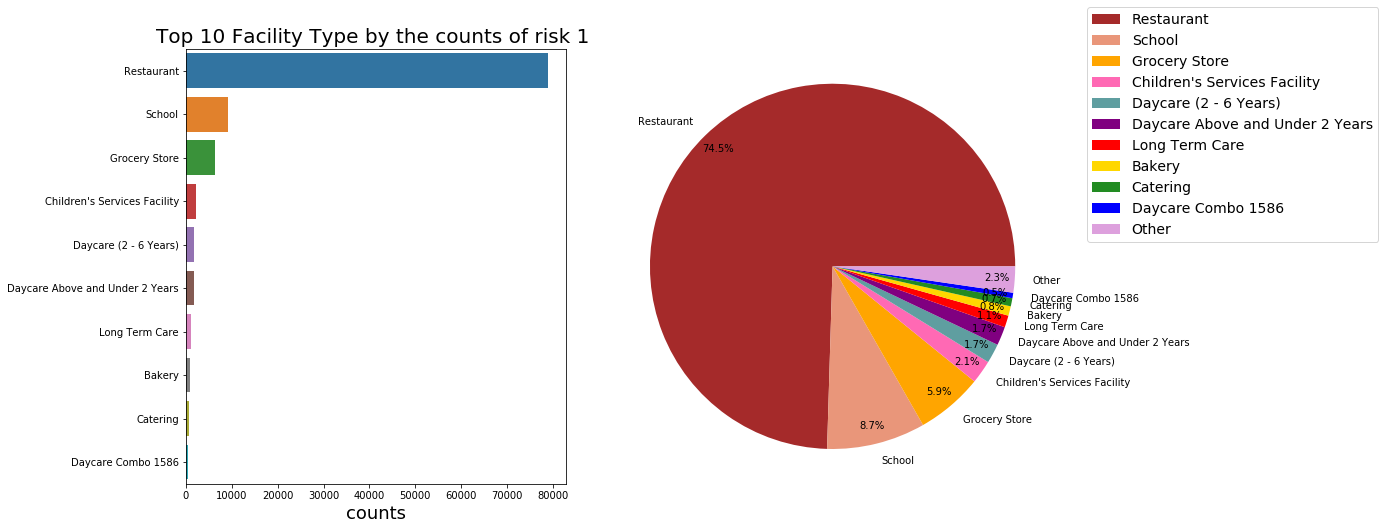

In [11]:
fig,ax=plt.subplots(1,2,figsize=(15,8))
sns.barplot(x=data_risk1['Facility Type'].value_counts()[:10],y=data_risk1['Facility Type'].value_counts()[:10].index,ax=ax[0])
ax[0].set_title("Top 10 Facility Type by the counts of risk 1 ",size=20)
ax[0].set_xlabel('counts',size=18)


count=data_risk1.groupby(['Facility Type'])['Inspection ID'].agg('count').sort_values(ascending=False)
groups=list(data_risk1.groupby(['Facility Type'])['Inspection ID'].agg('count').sort_values(ascending=False).index[:10])
counts=list(count[:10])
counts.append(count.agg(sum)-count[:10].agg('sum'))
groups.append('Other')
type_dict=pd.DataFrame({"group":groups,"counts":counts})
clr1=('brown','darksalmon','orange','hotpink','cadetblue','purple','red','gold','forestgreen','blue','plum')
type_dict.plot(kind='pie', y='counts', labels=groups,colors=clr1,autopct='%1.1f%%', pctdistance=0.9, radius=1.2,ax=ax[1])
ax[1].set_ylabel('')
ax[1].legend(loc=0, ncol=1, fontsize=14,bbox_to_anchor=(1.15,1.2))

In [12]:
data_risk1_2000=data_risk1[:2000]
Long=data_risk1_2000.Longitude.mean()
Lat=data_risk1_2000.Latitude.mean()
risk1_map=folium.Map([Lat,Long],zoom_start=12)

risk1_distribution_map=plugins.MarkerCluster().add_to(risk1_map)
for lat,lon,label in zip(data_risk1_2000.Latitude,data_risk1_2000.Longitude,data_risk1_2000['AKA Name']):
    folium.Marker(location=[lat,lon],icon=None,popup=label).add_to(risk1_distribution_map)
risk1_map.add_child(risk1_distribution_map)

risk1_map

<h3 id="222">2.2.2 Visualization for Risk 2(Medium)

In [13]:
data_risk2=data[data.Risk=='Risk 2 (Medium)']
data_risk2.head()

Inspection ID                     DBA Name                     AKA Name  \
10        2311876                 EL CHURRITO3                 EL CHURRITO3   
18        2311799      La PALOMA GROCERY STORE      La PALOMA GROCERY STORE   
21        2311831  RANGOON BURMA GROCERY STORE  RANGOON BURMA GROCERY STORE   
22        2311777         LA DELICIA MICHOCANA         LA DELICIA MICHOCANA   
28        2311779             7-ELEVEN #30105F                     7-ELEVEN   

    License #  Facility Type             Risk              Address     City  \
10  2601982.0     Restaurant  Risk 2 (Medium)      3796 W 79TH ST   CHICAGO   
18  2059922.0  Grocery Store  Risk 2 (Medium)      4324 W 63RD ST   CHICAGO   
21  2677822.0  Grocery Store  Risk 2 (Medium)  6347 N ROCKWELL ST   CHICAGO   
22  2684735.0     Restaurant  Risk 2 (Medium)   8119 S PULASKI RD   CHICAGO   
28  2657921.0  Grocery Store  Risk 2 (Medium)  6000 W HIGGINS AVE   CHICAGO   

   State      Zip  ...  Longitude  \
10    IL  60652.0  ... -87.718101   
18    IL  60629.0  ... -87.731160   
21    IL  60659.0  ... -87.694599   
22    IL  60629.0  ... -87.721626   
28    IL  60630.0  ... -87.778242   

                                             Location  \
10  {'latitude': '-87.71810075889891', 'longitude'...   
18  {'latitude': '-87.73115964657633', 'longitude'...   
21  {'latitude': '-87.69459930016968', 'longitude'...   
22  {'latitude': '-87.72162642011324', 'longitude'...   
28  {'latitude': '-87.77824228698391', 'longitude'...   

   Historical Wards 2003-2015 Zip Codes  Community Areas  Census Tracts Wards  \
10                        NaN       NaN              NaN            NaN   NaN   
18                        NaN       NaN              NaN            NaN   NaN   
21                        NaN       NaN              NaN            NaN   NaN   
22                        NaN       NaN              NaN            NaN   NaN   
28                        NaN       NaN              NaN            NaN   NaN   

    year  month  day  
10  2019     09   06  
18  2019     09   05  
21  2019     09   05  
22  2019     09   05  
28  2019     09   05  

[5 rows x 25 columns]

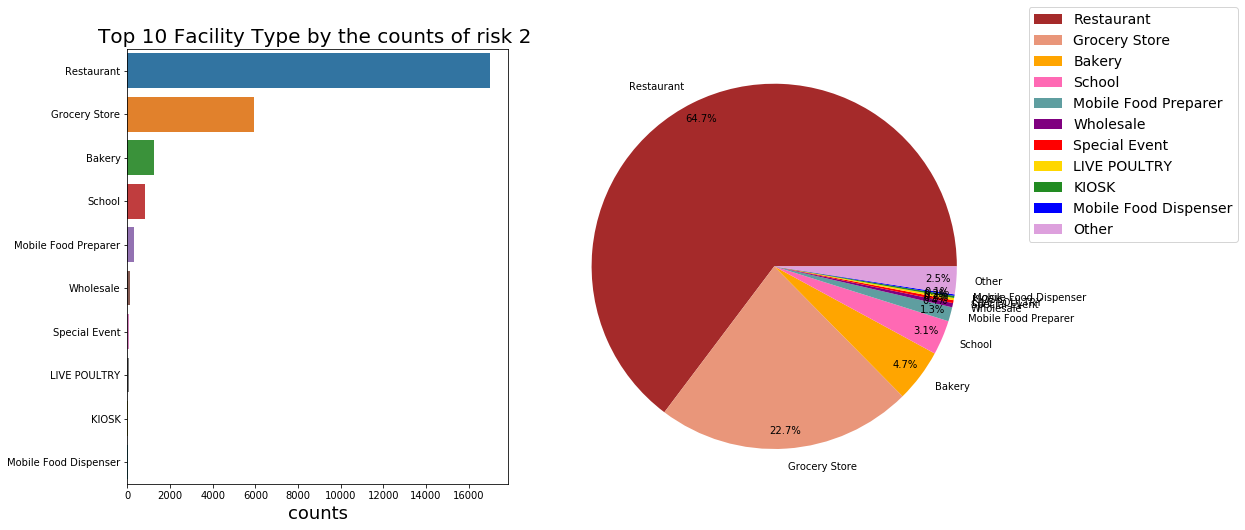

In [14]:
fig,ax=plt.subplots(1,2,figsize=(15,8))
sns.barplot(x=data_risk2['Facility Type'].value_counts()[:10],y=data_risk2['Facility Type'].value_counts()[:10].index,ax=ax[0])
ax[0].set_title("Top 10 Facility Type by the counts of risk 2 ",size=20)
ax[0].set_xlabel('counts',size=18)


count=data_risk2.groupby(['Facility Type'])['Inspection ID'].agg('count').sort_values(ascending=False)
groups=list(data_risk2.groupby(['Facility Type'])['Inspection ID'].agg('count').sort_values(ascending=False).index[:10])
counts=list(count[:10])
counts.append(count.agg(sum)-count[:10].agg('sum'))
groups.append('Other')
type_dict=pd.DataFrame({"group":groups,"counts":counts})
clr1=('brown','darksalmon','orange','hotpink','cadetblue','purple','red','gold','forestgreen','blue','plum')
type_dict.plot(kind='pie', y='counts', labels=groups,colors=clr1,autopct='%1.1f%%', pctdistance=0.9, radius=1.2,ax=ax[1])
ax[1].set_ylabel('')
ax[1].legend(loc=0, ncol=1, fontsize=14,bbox_to_anchor=(1.15,1.2))

In [15]:
data_risk2_2000=data_risk2[:2000]
Long=data_risk2_2000.Longitude.mean()
Lat=data_risk2_2000.Latitude.mean()
risk2_map=folium.Map([Lat,Long],zoom_start=12)

risk2_distribution_map=plugins.MarkerCluster().add_to(risk2_map)
for lat,lon,label in zip(data_risk2_2000.Latitude,data_risk2_2000.Longitude,data_risk2_2000['AKA Name']):
    folium.Marker(location=[lat,lon],icon=None,popup=label).add_to(risk2_distribution_map)
risk2_map.add_child(risk2_distribution_map)

risk2_map

<h3 id="223">2.2.3 Visualization for Risk 3(Low)

In [16]:
data_risk3=data[data.Risk=='Risk 3 (Low)']
data_risk3.head()

Inspection ID                   DBA Name              AKA Name  \
0          2311862           WALGREENS #15197             WALGREENS   
1          2311920  K & H FOOD MART PLUS, INC  K & H FOOD MART PLUS   
15         2311805               ALDI INC #64          ALDI INC #64   
99         2311689          MUSIC BOX THEATRE     MUSIC BOX THEATRE   
117        2311627         DOLLAR TREE #08040           DOLLAR TREE   

     License #  Facility Type          Risk                     Address  \
0    2245833.0  Grocery Store  Risk 3 (Low)            6121 N BROADWAY    
1    2684475.0  Grocery Store  Risk 3 (Low)           3929 W GRAND AVE    
15     13976.0  Grocery Store  Risk 3 (Low)       1753 N MILWAUKEE AVE    
99   2358986.0        THEATRE  Risk 3 (Low)  3733-3735 N SOUTHPORT AVE    
117  2671044.0  Grocery Store  Risk 3 (Low)             1312 E 79TH ST    

        City State      Zip  ...  Longitude  \
0    CHICAGO    IL  60660.0  ... -87.660210   
1    CHICAGO    IL  60651.0  ... -87.725112   
15   CHICAGO    IL  60647.0  ... -87.681822   
99   CHICAGO    IL  60613.0  ... -87.663947   
117  CHICAGO    IL  60619.0  ... -87.592489   

                                              Location  \
0    {'latitude': '-87.66021032628072', 'longitude'...   
1    {'latitude': '-87.72511200015292', 'longitude'...   
15   {'latitude': '-87.68182248081257', 'longitude'...   
99   {'latitude': '-87.66394689129923', 'longitude'...   
117  {'latitude': '-87.59248856477217', 'longitude'...   

    Historical Wards 2003-2015 Zip Codes  Community Areas  Census Tracts  \
0                          NaN       NaN              NaN            NaN   
1                          NaN       NaN              NaN            NaN   
15                         NaN       NaN              NaN            NaN   
99                         NaN       NaN              NaN            NaN   
117                        NaN       NaN              NaN            NaN   

    Wards  year  month  day  
0     NaN  2019     09   06  
1     NaN  2019     09   06  
15    NaN  2019     09   05  
99    NaN  2019     09   03  
117   NaN  2019     09   03  

[5 rows x 25 columns]

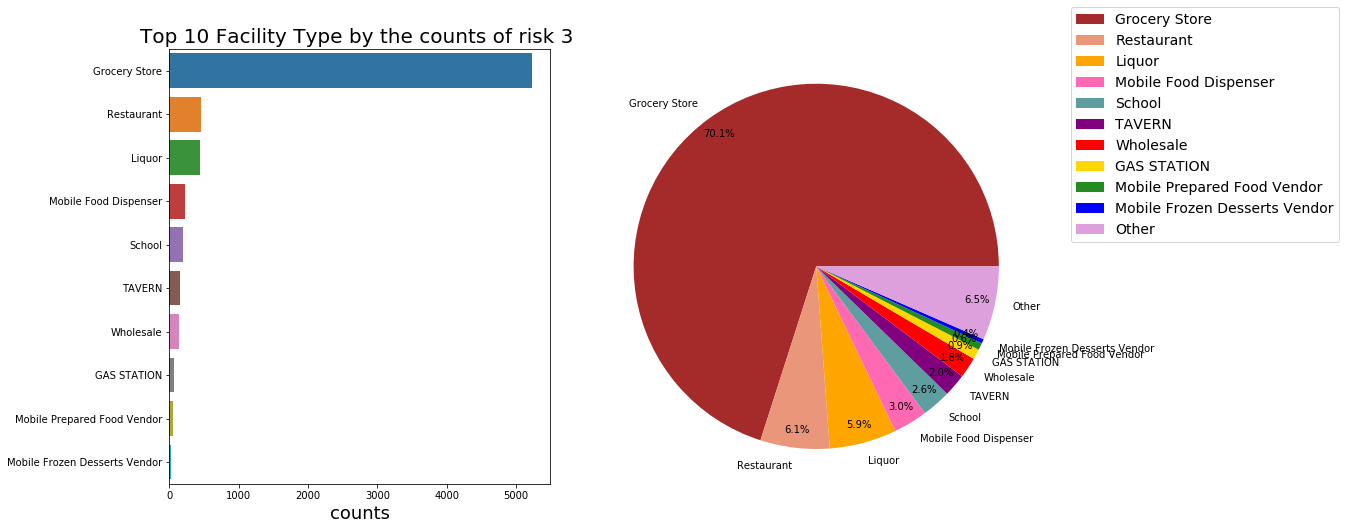

In [17]:
fig,ax=plt.subplots(1,2,figsize=(15,8))
sns.barplot(x=data_risk3['Facility Type'].value_counts()[:10],y=data_risk3['Facility Type'].value_counts()[:10].index,ax=ax[0])
ax[0].set_title("Top 10 Facility Type by the counts of risk 3 ",size=20)
ax[0].set_xlabel('counts',size=18)


count=data_risk3.groupby(['Facility Type'])['Inspection ID'].agg('count').sort_values(ascending=False)
groups=list(data_risk3.groupby(['Facility Type'])['Inspection ID'].agg('count').sort_values(ascending=False).index[:10])
counts=list(count[:10])
counts.append(count.agg(sum)-count[:10].agg('sum'))
groups.append('Other')
type_dict=pd.DataFrame({"group":groups,"counts":counts})
clr1=('brown','darksalmon','orange','hotpink','cadetblue','purple','red','gold','forestgreen','blue','plum')
type_dict.plot(kind='pie', y='counts', labels=groups,colors=clr1,autopct='%1.1f%%', pctdistance=0.9, radius=1.2,ax=ax[1])
ax[1].set_ylabel('')
ax[1].legend(loc=0, ncol=1, fontsize=14,bbox_to_anchor=(1.15,1.2))

In [18]:
data_risk3_2000=data_risk3[:2000]
data_risk3_2000['AKA Name']=data_risk3_2000['AKA Name'].apply(lambda x:x.strip('`').strip())
Long=data_risk3_2000.Longitude.mean()
Lat=data_risk3_2000.Latitude.mean()
risk3_map=folium.Map([Lat,Long],zoom_start=12)

risk3_distribution_map=plugins.MarkerCluster().add_to(risk3_map)
for lat,lon,label in zip(data_risk3_2000.Latitude,data_risk3_2000.Longitude,data_risk3_2000['AKA Name']):
    folium.Marker(location=[lat,lon],icon=None,popup=label).add_to(risk3_distribution_map)
risk3_map.add_child(risk3_distribution_map)

risk3_map

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<h3 id="23">2.3 Visualization for Facility Type	

Text(0, 0.5, 'LATITUDE')

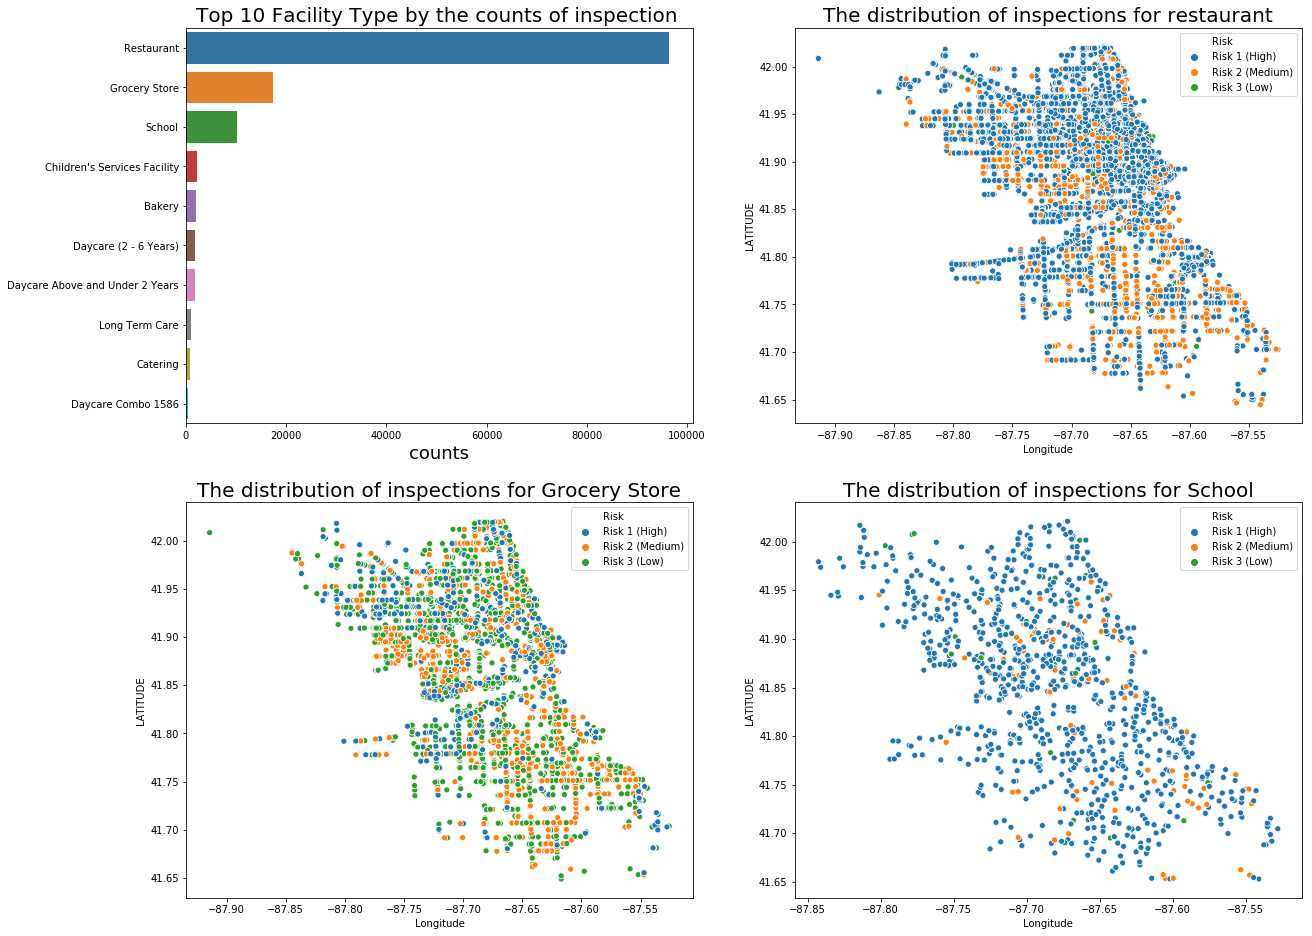

In [19]:
fig,ax=plt.subplots(2,2,figsize=(20,16))
y=data['Facility Type'].value_counts()[:10].index
x=data['Facility Type'].value_counts()[:10]
sns.barplot(x=x,y=y,ax=ax[0,0])
ax[0,0].set_title("Top 10 Facility Type by the counts of inspection ",size=20)
ax[0,0].set_xlabel('counts',size=18)
ax[0,0].set_ylabel('')

sns.scatterplot(x='Longitude',y='Latitude',hue='Risk',hue_order=['Risk 1 (High)','Risk 2 (Medium)','Risk 3 (Low)'] ,data=data[data['Facility Type']=='Restaurant'], ax=ax[0,1])
ax[0,1].set_title("The distribution of inspections for restaurant",size=20)
ax[0,1].set_xlabel('Longitude')
ax[0,1].set_ylabel('LATITUDE')

sns.scatterplot(x='Longitude',y='Latitude',hue='Risk' ,hue_order=['Risk 1 (High)','Risk 2 (Medium)','Risk 3 (Low)'],data=data[data['Facility Type']=='Grocery Store'], ax=ax[1,0])
ax[1,0].set_title("The distribution of inspections for Grocery Store",size=20)
ax[1,0].set_xlabel('Longitude')
ax[1,0].set_ylabel('LATITUDE')

sns.scatterplot(x='Longitude',y='Latitude',hue='Risk',hue_order=['Risk 1 (High)','Risk 2 (Medium)','Risk 3 (Low)'] ,data=data[data['Facility Type']=='School'], ax=ax[1,1])
ax[1,1].set_title("The distribution of inspections for School",size=20)
ax[1,1].set_xlabel('Longitude')
ax[1,1].set_ylabel('LATITUDE')

<h3 id="24">2.4 Visualization for Results of inspection

Text(0, 0.5, 'LATITUDE')

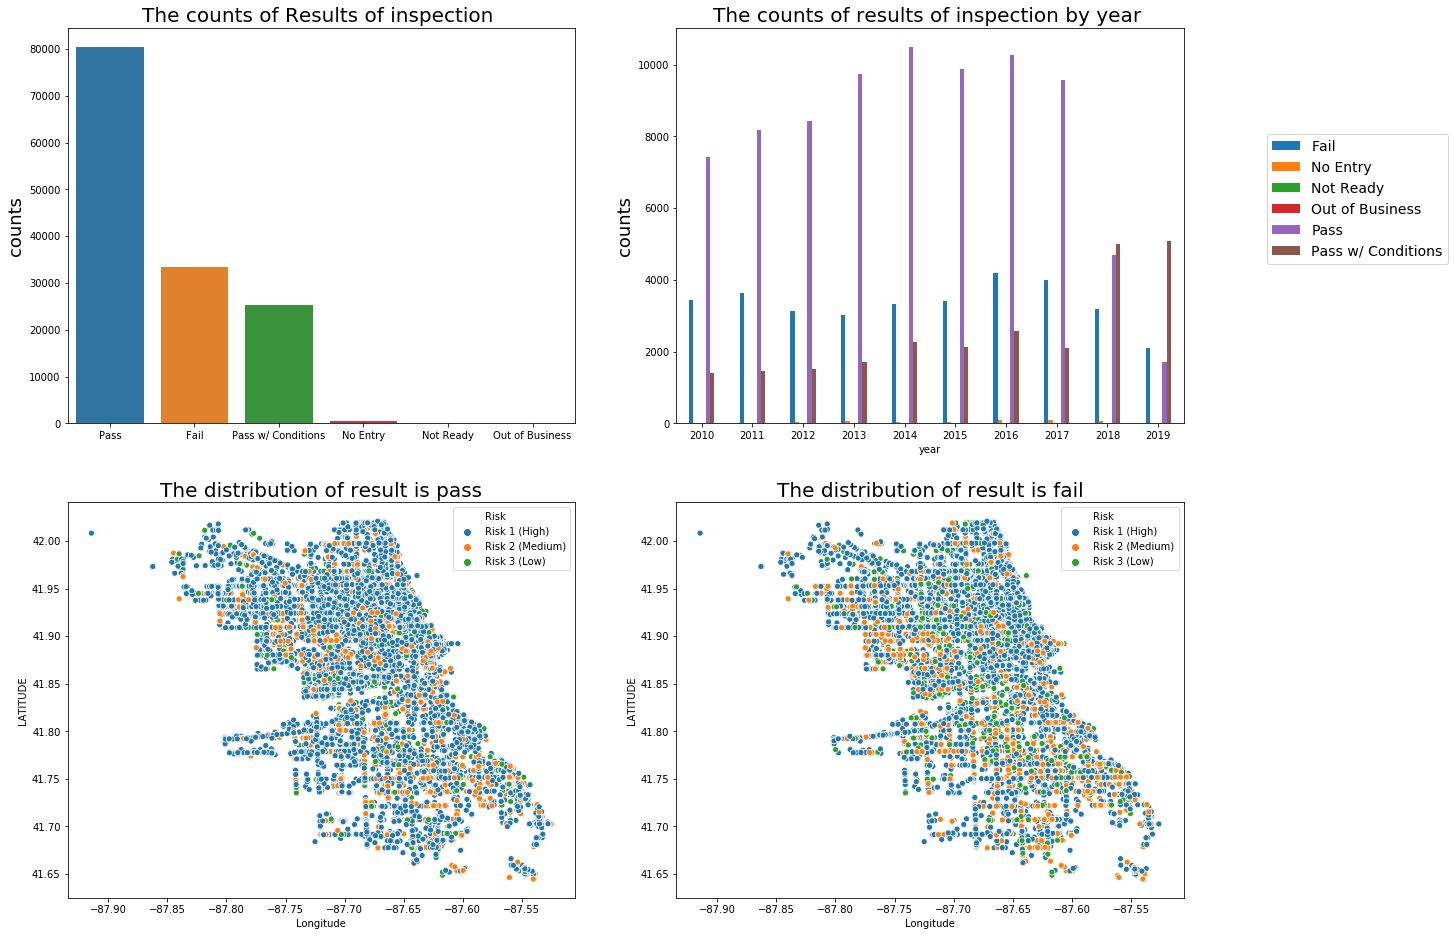

In [20]:
fig,ax=plt.subplots(2,2,figsize=(20,16))
x=data.Results.value_counts().index
y=data.Results.value_counts()
sns.barplot(x=x,y=y,ax=ax[0,0])
ax[0,0].set_title("The counts of Results of inspection ",size=20)
ax[0,0].set_ylabel('counts',size=18)
ax[0,0].set_xlabel('')

data.groupby(['Results','year'])['Inspection ID'].agg('count').unstack('Results').plot(kind='bar',ax=ax[0,1])
ax[0,1].tick_params(axis='x',labelrotation=360)
ax[0,1].legend(loc=0, ncol=1, fontsize=14,bbox_to_anchor=(1.15,0.75))
ax[0,1].set_title("The counts of results of inspection by year ",size=20)
ax[0,1].set_ylabel('counts',size=18)

sns.scatterplot(x='Longitude',y='Latitude',hue='Risk' ,hue_order=['Risk 1 (High)','Risk 2 (Medium)','Risk 3 (Low)'],data=data[data.Results=='Pass'], ax=ax[1,0])
ax[1,0].set_title("The distribution of result is pass",size=20)
ax[1,0].set_xlabel('Longitude')
ax[1,0].set_ylabel('LATITUDE')

sns.scatterplot(x='Longitude',y='Latitude',hue='Risk',hue_order=['Risk 1 (High)','Risk 2 (Medium)','Risk 3 (Low)'] ,data=data[data.Results=='Fail'], ax=ax[1,1])
ax[1,1].set_title("The distribution of result is fail",size=20)
ax[1,1].set_xlabel('Longitude')
ax[1,1].set_ylabel('LATITUDE')